<a href="https://colab.research.google.com/github/caroline-dainezi-fatec/Fatec-Mineracao-de-Dados-2SEM-2024/blob/main/Mineracao_de_Dados_05_10_Caroline_Dainezi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mineração de Dados - Atividade do dia 05/10**
**Nome:** Caroline de Souza Dainezi

# **Importação das bibliotecas utilizadas**

Serão utilizadas as biblioteca **pandas** e **seaborn**, a função **files** da biblioteca **Google Colab** e a função **pyplot** da biblioteca **matplotlib**.

In [33]:
import pandas as pd
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

# **Base de dados escolhida**

Foi escolhida uma base de dados sobre filmes e séries disponíveis na **Netflix** e suas pontuações no site **IMDB**. Foi atualizada em dezembro de 2023 e conta com 5283 linhas no total, com filmes e séries de até 2022.

As colunas presentes no conjunto de dados são as seguintes:
* **title:** O nome da série ou filme. (Texto)
* **type:** Indica se o registro é uma série ou um filme. (Texto)
* **description:** Um breve sumário ou descrição da série ou filme. (Texto)
* **release_year:** O ano em que a série ou filme foi lançado. (Numérico)
* **age_certification:** A classificação indicativa dos EUA para a série ou filme. (Texto)
* **runtime:** A duração de um episódio para séries ou duração do filme. (Texto)
* **imdb_score:** A pontuação dada por usuários no IMDB para o título. (Numérico)
* **imdb_votes:** O número de votos recebidos para cada título no IMDB. (Numérico)

A base de dados foi baixada do site **Kaggle** e está disponível neste [link](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores/) para download e mais informações.

# **Leitura do arquivo CSV**

Fazendo upload do arquivo utilizando a biblioteca do **Google Colab** e lendo os dados com a biblioteca **pandas**.

In [36]:
uploaded = files.upload()

df = pd.read_csv('Netflix TV Shows and Movies.csv')

df.head()

Saving Netflix TV Shows and Movies.csv to Netflix TV Shows and Movies.csv


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


# **Tratando valores nulos**

Verificando a presença de nulos no arquivo CSV:

In [37]:
df.isnull().sum()

,0
index,0
id,0
title,0
type,0
description,5
release_year,0
age_certification,2285
runtime,0
imdb_id,0
imdb_score,0


Substituindo valores nulos da coluna **imdb_votes** pela média:

In [38]:
df['imdb_votes'].fillna(df['imdb_votes'].mean(), inplace=True)

<ipython-input-38-f9f745c449c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_votes'].fillna(df['imdb_votes'].mean(), inplace=True)


Substituindo os valores nulos da coluna **age_certification** por um valor padrão:

In [39]:
df['age_certification'].fillna('Desconhecido', inplace=True)

<ipython-input-39-d1039932154d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_certification'].fillna('Desconhecido', inplace=True)


Substituindo os valores da coluna **description** por um valor padrão:

In [40]:
df['description'].fillna('-', inplace=True)

<ipython-input-40-9d17dc587ec9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('-', inplace=True)


Validando que os valores não são mais nulos:

In [41]:
df.isnull().sum()

,0
index,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
imdb_id,0
imdb_score,0


# **Tipos de dados do DataFrame**

Especificando os tipos de dados do DataFrame para garantir que estejam corretos.

In [42]:
df['imdb_votes'] = pd.to_numeric(df['imdb_votes'], errors='coerce')

df['age_certification'] = df['age_certification'].astype('category')
df['description'] = df['description'].astype('category')

# **Exploração estatística dos dados**

Estatísticas descritivas para variáveis **numéricas** e frequência de valores para variáveis **categóricas**:

In [43]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.283000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.700224e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.220000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.285000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.027600e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [44]:
df['type'].value_counts()

,count
type,
MOVIE,3407
SHOW,1876


In [45]:
df['age_certification'].value_counts()

,count
age_certification,
Desconhecido,2285
TV-MA,792
R,548
TV-14,436
PG-13,424
PG,238
TV-PG,172
G,105
TV-Y7,104


# **Criação de gráficos**

Visualizando os dados agora limpos através de representações visuais, procurando padrões e distribuição dos valores.

## **Gráficos para variáveis numéricas**

1. **Histograma**

  Gerando um histograma apresentando a distribuição das pontuações no IMDB para cada título.

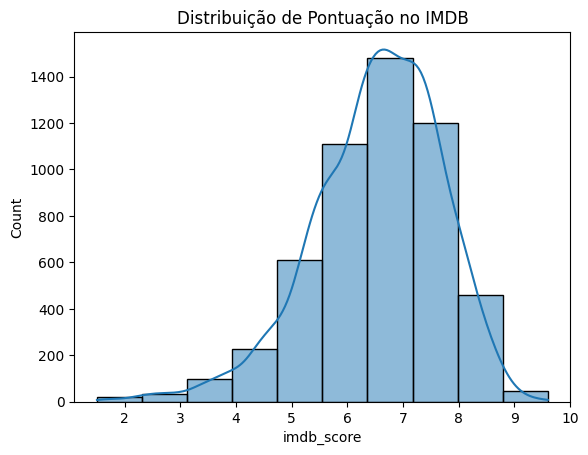

In [51]:
sns.histplot(x=df['imdb_score'], bins=10, kde=True)

plt.title('Distribuição de Pontuação no IMDB')
plt.show()

Através do gráfico acima, podemos concluir que a pontuação dos filmes e séries permaneceu, em sua grande maioria, na margem entre **6** e **8**. Houveram pouquíssimos títulos com scores abaixo de **3**, assim como acima de **9**.

2. **Boxplot**

  Gerando um gráfico boxplot para detectar outliers e dispersão dos dados na pontuação do IMDB.

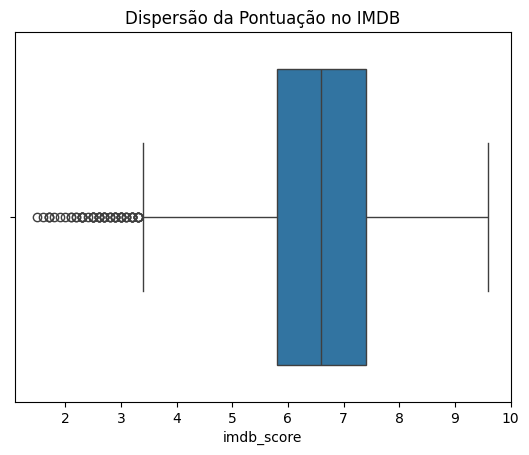

In [50]:
sns.boxplot(x=df['imdb_score'])

plt.title('Dispersão da Pontuação no IMDB')
plt.show()

O boxplot exibe uma quantidade de considerável de outliers por volta da pontuação **3.5 e abaixo**, porém maioria dos dados se concentram, novamente, na margem de **6** a **8**.

Na faixa dos valores típicos, as pontuações se posicionam de forma bastante **simétrica**, onde a mediana se encontra centralizada.

## **Gráficos para variáveis categóricas**

1. **Gráfico de Barras**

  Gerando um gráfico de barras para visualizar a contagem de títulos categorizados como filmes e os categorizados como séries.

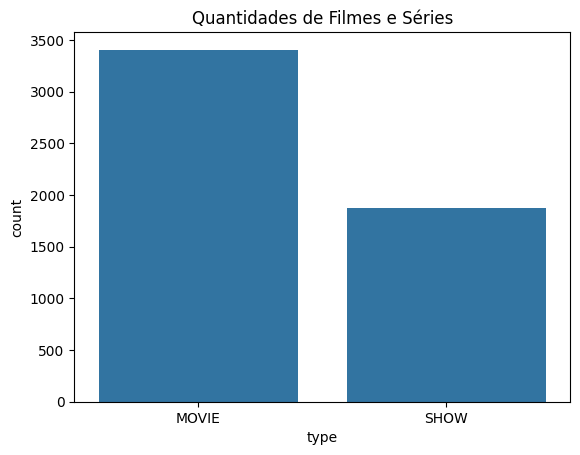

In [57]:
sns.countplot(x='type', data=df)

plt.title('Quantidades de Filmes e Séries')
plt.show()

Podemos ver que maioria dos títulos apresentados nos nossos dados são filmes, contando com quase **3500** registros, enquanto as séries permanecem ligeiramente abaixo dos **2000**.

2. **Gráfico de Pizza**

  Gerando um gráfico de pizza (pie chart) para identificar as proporções entre as classificações indicativas. Foi utilizada uma função para não exibir porcentagens menores que **2%** para tornar o gráfico mais legível.

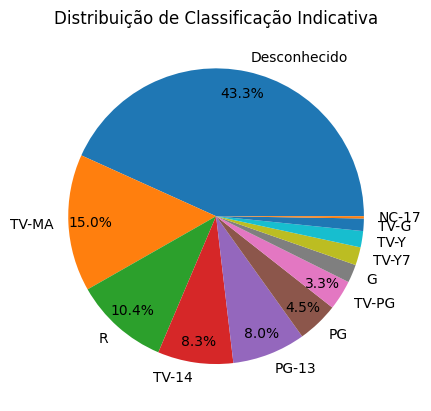

In [90]:
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

df['age_certification'].value_counts().plot.pie(
    autopct=autopct_func,
    pctdistance=0.85
)

plt.title('Distribuição de Classificação Indicativa')
plt.ylabel('')
plt.show()

Como vimos anteriormente na limpeza dos dados, maioria dos registros apresentam classificação indicativa desconhecida. Porém, dos valores informados, podemos ver que maioria são classificados como:
* **TV-MA** (inadequado para menores de 17 anos)
* **R** (menores de 17 anos devem assistir sob supervisão de um adulto)
* **TV-14** (inadequado para menores de 14 anos)
* **PG-13** (inadequado para menores de 13 anos)

Com as classificações citadas acima, podemos concluir que maioria dos títulos com classificação indicativa informada são mais adequados para uma **audiência mais madura** como um todo.

## **Gráficos relacionais**

1. **Gráfico de Dispersão**
  Gerando um gráfico de dispersão para verificar se existe alguma correlação entre

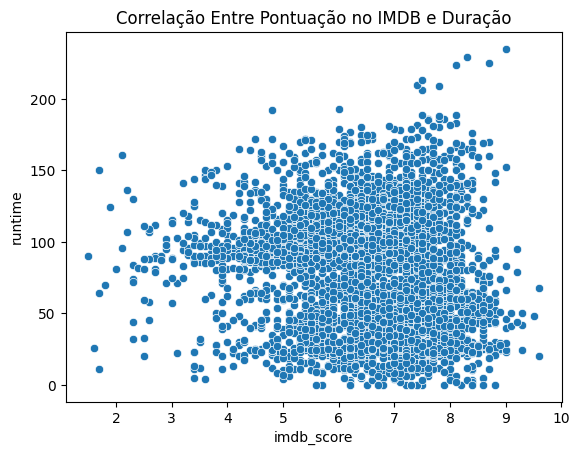

In [95]:
sns.scatterplot(x='imdb_score', y='runtime', data=df)

plt.title('Correlação Entre Pontuação no IMDB e Duração')
plt.show()

Observando o gráfico acima, podemos ver que não há nenhuma relação muito forte entre a pontuação no IMDB e a duração do título. Porém, uma observação que podemos fazer é que maioria das pontuações acima de **8** estão distribuídas entre os títulos com menos de **100 minutos** de duração (filmes mais curtos e episódios de séries).

# **Conclusão dos dados observados**

Após a exploração dos dados e a criação de gráficos, é hora de analisar os  insights obtidos.

**Atividade:** Com base nos gráficos e análises realizadas, responda às seguintes  perguntas:

1. Quais padrões você observou nas variáveis numéricas? (exemplo: distribuição normal, outliers)

  *R: O histograma sobre a pontuação no IMDB apresentou uma distribuição próxima da nomral, onde maioria dos valores se concentraram por volta do 7 e reduziram de forma simétrica para os dois lados, formando uma típica curva de sino.*
  
  *Além disso, foram identificados vários outliers no boxplot de pontuação no IMDB, abaixo da pontuação de 3.5.*

2. Como estão distribuídas as variáveis categóricas? Alguma categoria se destaca em termos de frequência?

  *R: Foi possível reparar que maioria dos dados sendo analisados eram filmes, tendo quase o dobro de títulos registrados em comparação às séries (3407 contra 1876).*
  
  *Além disso, os registros com classificação indicativa informada apresentaram uma tendência para filmes com classificação indicativa mais alta (TV-MA, R e TV-14).*

3. Você identificou correlações entre variáveis numéricas? Qual pode ser a relação entre essas variáveis?

  *R: Nenhuma correlação muito forte ou evidente foi identificada durante a análise, porém, no scatterplot entre a pontuação no IMDB e duração do título, foi possível ver uma pequena concentração de notas mais altas (acima de 8) para títulos abaixo de 100 minutos de duração.*

4. Com base nos dados, quais são as principais conclusões que você pode tirar? O que essas conclusões indicam para o contexto do dataset escolhido?

  *R: Pode-se concluir que, entre os títulos presentes na base de dados, não houveram nenhuma grande quantidade de obras extremamente bem avaliadas, ao invés disso foi visível uma concentração grande de registros com pontuações medianas. Apesar de nenhum outlier positivo, durante o período em que foram lançados os filmes e séries analisados (até 2022), houveram alguns títulos com pontuações muito baixas (abaixo de 3.5).*
  
  *Foi identificado também que maioria dos títulos apresentados são de classificações indicativas mais elevadas, o que pode implicar uma grande quantidade de conteúdo mais maduro sendo apresentado na mídia nesses últimos anos. Foi aparente também uma tendência de conteúdos com tempo de tela mais curto, seja por serem divididos em episódios ou por serem filmes realmente menores.*